<a href="https://colab.research.google.com/github/cotrader/Exchange-API/blob/master/BDT%20Project/%20BDT_Project_ICA_SEM6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas_datareader

In [7]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from __future__ import division
import datetime

In [ ]:
from pandas_datareader import data as web

In [1]:
import yfinance as yf
import pandas as pd
import datetime

def get(tickers, startdate, enddate):
    def data(ticker):
        return yf.download(ticker, start=startdate, end=enddate)

    datas = map(data, tickers)
    return pd.concat(datas, keys=tickers, names=['Ticker', 'Date'])

tickers = ['JINDALSTEL.NS', 'JSWSTEEL.NS', 'HINDALCO.NS', 'TATASTEEL.NS']
all_data = get(tickers, datetime.datetime(2015, 1, 1), datetime.datetime(2020, 1, 1))
all_data

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Open        High         Low       Close  \
Ticker        Date                                                         
JINDALSTEL.NS 2015-01-01  152.000000  158.350006  150.500000  156.550003   
              2015-01-02  158.000000  164.600006  157.600006  161.949997   
              2015-01-05  164.800003  166.750000  161.199997  162.850006   
              2015-01-06  160.949997  163.399994  151.050003  152.649994   
              2015-01-07  154.199997  154.750000  148.600006  150.350006   
...                              ...         ...         ...         ...   
TATASTEEL.NS  2019-12-24   46.220001   46.470001   45.939999   46.299999   
              2019-12-26   46.299999   47.200001   46.299999   46.790001   
              2019-12-27   46.924999   47.180000   46.320000   46.950001   
              2019-12-30   47.009998   47.630001   46.509998   47.474998   
              2019-12-31   47.264999   47.529999   46.950001   47.205002   

                           Adj Close     Volume  
Ticker        Date                               
JINDALSTEL.NS 2015-01-01  154.998337    6913722  
              2015-01-02  160.344803    8169041  
              2015-01-05  161.235870   12103749  
              2015-01-06  151.136963    9730592  
              2015-01-07  148.859787    5299465  
...                              ...        ...  
TATASTEEL.NS  2019-12-24   19.001764  112355050  
              2019-12-26   19.202864  182556030  
              2019-12-27   19.268526  111443330  
              2019-12-30   19.483990  114620740  
              2019-12-31   19.373182   96441450  

[4916 rows x 6 columns]

In [2]:
all_data

Open        High         Low       Close  \
Ticker        Date                                                         
JINDALSTEL.NS 2015-01-01  152.000000  158.350006  150.500000  156.550003   
              2015-01-02  158.000000  164.600006  157.600006  161.949997   
              2015-01-05  164.800003  166.750000  161.199997  162.850006   
              2015-01-06  160.949997  163.399994  151.050003  152.649994   
              2015-01-07  154.199997  154.750000  148.600006  150.350006   
...                              ...         ...         ...         ...   
TATASTEEL.NS  2019-12-24   46.220001   46.470001   45.939999   46.299999   
              2019-12-26   46.299999   47.200001   46.299999   46.790001   
              2019-12-27   46.924999   47.180000   46.320000   46.950001   
              2019-12-30   47.009998   47.630001   46.509998   47.474998   
              2019-12-31   47.264999   47.529999   46.950001   47.205002   

                           Adj Close     Volume  
Ticker        Date                               
JINDALSTEL.NS 2015-01-01  154.998337    6913722  
              2015-01-02  160.344803    8169041  
              2015-01-05  161.235870   12103749  
              2015-01-06  151.136963    9730592  
              2015-01-07  148.859787    5299465  
...                              ...        ...  
TATASTEEL.NS  2019-12-24   19.001764  112355050  
              2019-12-26   19.202864  182556030  
              2019-12-27   19.268526  111443330  
              2019-12-30   19.483990  114620740  
              2019-12-31   19.373182   96441450  

[4916 rows x 6 columns]

<ipython-input-3-75da701b0321>:5: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')


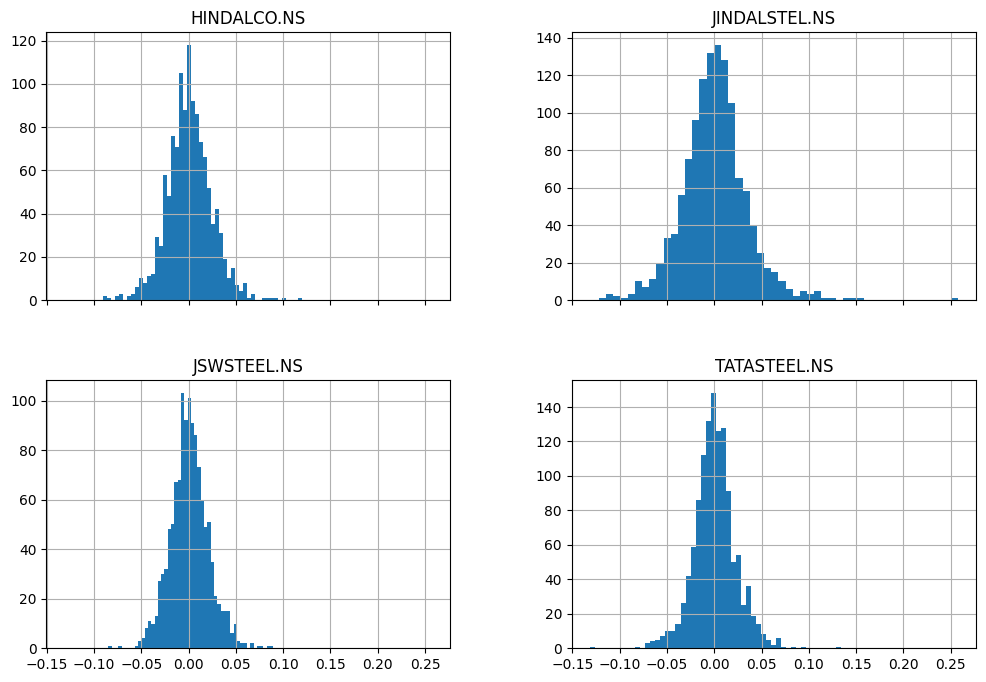

In [3]:
# Import matplotlib
import matplotlib.pyplot as plt

# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report

In [5]:
datas=all_data

In [8]:
# Initialize the `signals` DataFrame with the `signal` column
datas['signal'] = 0.0

# Create short simple moving average over the short window
datas['short_mavg'] = datas['Close'].rolling(window=30, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
datas['long_mavg'] = datas['Close'].rolling(window=120, min_periods=1, center=False).mean()

# Create signals
datas['signal'] = np.where(datas['short_mavg'] > datas['long_mavg'], 1.0, 0.0)

In [9]:
#calculation of exponential moving average
def EMA(df, n):
    EMA = pd.Series(df['Close'].ewm(span=n, min_periods=n).mean(), name='EMA_' + str(n))
    return EMA
datas['EMA21'] = EMA(datas, 21)
datas['EMA63'] = EMA(datas, 63)
datas['EMA252'] = EMA(datas, 252)
datas.head()

#calculation of rate of change
def ROC(df, n):
    M = df.diff(n - 1)
    N = df.shift(n - 1)
    ROC = pd.Series(((M / N) * 100), name = 'ROC_' + str(n))
    return ROC
datas['ROC21'] = ROC(datas['Close'], 21)
datas['ROC63'] = ROC(datas['Close'], 63)

#Calculation of price momentum
def MOM(df, n):
    MOM = pd.Series(df.diff(n), name='Momentum_' + str(n))
    return MOM
datas['MOM21'] = MOM(datas['Close'], 21)
datas['MOM63'] = MOM(datas['Close'], 63)

#calculation of relative strength index
def RSI(series, period):
 delta = series.diff().dropna()
 u = delta * 0
 d = u.copy()
 u[delta > 0] = delta[delta > 0]
 d[delta < 0] = -delta[delta < 0]
 u[u.index[period-1]] = np.mean( u[:period] ) #first value is sum of avg gains
 u = u.drop(u.index[:(period-1)])
 d[d.index[period-1]] = np.mean( d[:period] ) #first value is sum of avg losses
 d = d.drop(d.index[:(period-1)])
 #rs = pd.stats.moments.ewma(u, com=period-1, adjust=False)
 rs=pd.DataFrame.ewm(u,com=period-1,adjust=False).mean()
 pd.DataFrame.ewm(d,com=period-1,adjust=False).mean()
 #pd.stats.moments.ewma(d, com=period-1, adjust=False)
 return 100 - 100 / (1 + (rs))
datas['RSI21'] = RSI(datas['Close'], 21)
datas['RSI63'] = RSI(datas['Close'], 63)
datas['RSI252'] = RSI(datas['Close'], 252)

#calculation of stochastic osillator.

def STOK(close, low, high, n):
 STOK = ((close - low.rolling(n).mean()) / (high.rolling(n).mean() - low.rolling(n).mean())) * 100
 return STOK

def STOD(close, low, high, n):
 STOK = ((close - low.rolling(n).mean()) / (high.rolling(n).mean() - low.rolling(n).mean())) * 100
 STOD = STOK.rolling(3).mean()
 return STOD
datas['%K21'] = STOK(datas['Close'], datas['Low'], datas['High'], 21)
datas['%D21'] = STOD(datas['Close'], datas['Low'], datas['High'], 21)
datas['%K63'] = STOK(datas['Close'], datas['Low'], datas['High'], 63)
datas['%D63'] = STOD(datas['Close'], datas['Low'], datas['High'], 63)
datas['%K252'] = STOK(datas['Close'], datas['Low'], datas['High'], 252)
datas['%D252'] = STOD(datas['Close'], datas['Low'], datas['High'], 252)


In [10]:
#Calculation of moving average
def MA(df, n):
    MA = pd.Series(df['Close'].rolling(n, min_periods=n).mean(), name='MA_' + str(n))
    return MA
datas['MA21'] = MA(datas, 21)
datas['MA63'] = MA(datas, 63)
datas['MA252'] = MA(datas, 252)
datas.tail()

Open       High        Low      Close  \
Ticker       Date                                                     
TATASTEEL.NS 2019-12-24  46.220001  46.470001  45.939999  46.299999   
             2019-12-26  46.299999  47.200001  46.299999  46.790001   
             2019-12-27  46.924999  47.180000  46.320000  46.950001   
             2019-12-30  47.009998  47.630001  46.509998  47.474998   
             2019-12-31  47.264999  47.529999  46.950001  47.205002   

                         Adj Close     Volume  signal  short_mavg  long_mavg  \
Ticker       Date                                                              
TATASTEEL.NS 2019-12-24  19.001764  112355050     1.0   41.789500  39.758500   
             2019-12-26  19.202864  182556030     1.0   42.022833  39.728083   
             2019-12-27  19.268526  111443330     1.0   42.281333  39.696875   
             2019-12-30  19.483990  114620740     1.0   42.548833  39.668500   
             2019-12-31  19.373182   96441450     1.0   42.755500  39.636625   

                             EMA21  ...     RSI252        %K21        %D21  \
Ticker       Date                   ...                                      
TATASTEEL.NS 2019-12-24  42.873827  ...  29.535248  346.329701  347.094070   
             2019-12-26  43.229843  ...  29.549206  372.098731  354.281185   
             2019-12-27  43.568039  ...  29.498072  367.113911  361.847448   
             2019-12-30  43.923217  ...  29.519091  393.586245  377.599629   
             2019-12-31  44.221561  ...  29.436434  357.760727  372.820294   

                               %K63        %D63       %K252       %D252  \
Ticker       Date                                                         
TATASTEEL.NS 2019-12-24  571.924624  563.659154  122.825785  115.230778   
             2019-12-26  604.038184  578.243284  157.767495  132.169200   
             2019-12-27  606.470496  594.144435  170.459179  150.350820   
             2019-12-30  631.856670  614.121783  207.619513  178.615396   
             2019-12-31  606.936295  615.087820  190.526285  189.534992   

                              MA21       MA63      MA252  
Ticker       Date                                         
TATASTEEL.NS 2019-12-24  42.559047  39.096349  45.206171  
             2019-12-26  42.767380  39.240079  45.185397  
             2019-12-27  42.996666  39.396746  45.168433  
             2019-12-30  43.199762  39.575635  45.153036  
             2019-12-31  43.411904  39.728492  45.132421  

[5 rows x 28 columns]

In [11]:
#Dealing with rows that contain NAN

print(datas.isnull().sum())
datasub=datas.dropna()
datasub.isnull().sum()
datasub

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
signal          0
short_mavg      0
long_mavg       0
EMA21          20
EMA63          62
EMA252        251
ROC21          20
ROC63          62
MOM21          21
MOM63          63
RSI21          21
RSI63          63
RSI252        252
%K21           20
%D21           22
%K63           62
%D63           64
%K252         251
%D252         253
MA21           20
MA63           62
MA252         251
dtype: int64


Open       High        Low      Close  \
Ticker        Date                                                     
JINDALSTEL.NS 2016-01-12  83.699997  85.449997  79.199997  80.000000   
              2016-01-13  82.199997  82.800003  74.599998  77.800003   
              2016-01-14  76.699997  76.750000  71.500000  72.199997   
              2016-01-15  72.699997  73.199997  62.000000  64.000000   
              2016-01-18  62.349998  64.900002  59.000000  60.000000   
...                             ...        ...        ...        ...   
TATASTEEL.NS  2019-12-24  46.220001  46.470001  45.939999  46.299999   
              2019-12-26  46.299999  47.200001  46.299999  46.790001   
              2019-12-27  46.924999  47.180000  46.320000  46.950001   
              2019-12-30  47.009998  47.630001  46.509998  47.474998   
              2019-12-31  47.264999  47.529999  46.950001  47.205002   

                          Adj Close     Volume  signal  short_mavg  long_mavg  \
Ticker        Date                                                              
JINDALSTEL.NS 2016-01-12  79.207062   10828818     1.0   90.660000  77.257917   
              2016-01-13  77.028870   12945160     1.0   90.076666  77.232084   
              2016-01-14  71.484375   11858071     1.0   89.318333  77.177084   
              2016-01-15  63.365650   15515217     1.0   88.388333  77.064167   
              2016-01-18  59.405296   15693048     1.0   87.274999  76.920000   
...                             ...        ...     ...         ...        ...   
TATASTEEL.NS  2019-12-24  19.001764  112355050     1.0   41.789500  39.758500   
              2019-12-26  19.202864  182556030     1.0   42.022833  39.728083   
              2019-12-27  19.268526  111443330     1.0   42.281333  39.696875   
              2019-12-30  19.483990  114620740     1.0   42.548833  39.668500   
              2019-12-31  19.373182   96441450     1.0   42.755500  39.636625   

                              EMA21  ...     RSI252        %K21        %D21  \
Ticker        Date                   ...                                      
JINDALSTEL.NS 2016-01-12  88.932469  ...  55.161324 -228.633231 -160.941053   
              2016-01-13  87.920426  ...  55.062960 -261.240189 -207.749335   
              2016-01-14  86.491296  ...  54.964556 -367.838621 -285.904013   
              2016-01-15  84.446633  ...  54.866113 -486.824105 -371.967638   
              2016-01-18  82.224212  ...  54.767632 -530.122870 -461.595198   
...                             ...  ...        ...         ...         ...   
TATASTEEL.NS  2019-12-24  42.873827  ...  29.535248  346.329701  347.094070   
              2019-12-26  43.229843  ...  29.549206  372.098731  354.281185   
              2019-12-27  43.568039  ...  29.498072  367.113911  361.847448   
              2019-12-30  43.923217  ...  29.519091  393.586245  377.599629   
              2019-12-31  44.221561  ...  29.436434  357.760727  372.820294   

                                %K63        %D63       %K252       %D252  \
Ticker        Date                                                         
JINDALSTEL.NS 2016-01-12  -51.805182   20.058807 -461.038867 -417.818886   
              2016-01-13 -104.309941  -36.710906 -491.285958 -450.725100   
              2016-01-14 -235.658815 -130.591313 -582.442836 -511.589220   
              2016-01-15 -411.055147 -250.341301 -712.109810 -595.279535   
              2016-01-18 -492.632844 -379.782269 -773.191875 -689.248174   
...                              ...         ...         ...         ...   
TATASTEEL.NS  2019-12-24  571.924624  563.659154  122.825785  115.230778   
              2019-12-26  604.038184  578.243284  157.767495  132.169200   
              2019-12-27  606.470496  594.144435  170.459179  150.350820   
              2019-12-30  631.856670  614.121783  207.619513  178.615396   
              2019-12-31  606.936295  615.087820  190.526285  189.534992   

                       

In [12]:
datasub.to_excel('exp.xlsx')

In [13]:
#excluding columns that are not needed for our prediction.

datasubs=datasub.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg','Adj Close'], axis=1)
datasubs.head()

signal      EMA21      EMA63     EMA252      ROC21  \
Ticker        Date                                                             
JINDALSTEL.NS 2016-01-12     1.0  88.932469  85.417172  94.647026 -11.991201   
              2016-01-13     1.0  87.920426  85.179063  94.493569 -14.080618   
              2016-01-14     1.0  86.491296  84.773347  94.290744 -19.643853   
              2016-01-15     1.0  84.446633  84.123995  94.015489 -30.510314   
              2016-01-18     1.0  82.224212  83.369911  93.706752 -34.065934   

                              ROC63      MOM21      MOM63      RSI21  \
Ticker        Date                                                     
JINDALSTEL.NS 2016-01-12  15.273773  -6.750000   9.750000  48.080689   
              2016-01-13   7.015139 -13.099998   8.400002  46.864113   
              2016-01-14  -3.217160 -18.350006  -0.500000  45.651253   
              2016-01-15 -13.571914 -25.849998 -10.599998  44.443528   
              2016-01-18 -20.371598 -32.099998 -14.050003  43.242333   

                              RSI63     RSI252        %K21        %D21  \
Ticker        Date                                                       
JINDALSTEL.NS 2016-01-12  50.741488  55.161324 -228.633231 -160.941053   
              2016-01-13  50.341529  55.062960 -261.240189 -207.749335   
              2016-01-14  49.941526  54.964556 -367.838621 -285.904013   
              2016-01-15  49.541530  54.866113 -486.824105 -371.967638   
              2016-01-18  49.141593  54.767632 -530.122870 -461.595198   

                                %K63        %D63       %K252       %D252  \
Ticker        Date                                                         
JINDALSTEL.NS 2016-01-12  -51.805182   20.058807 -461.038867 -417.818886   
              2016-01-13 -104.309941  -36.710906 -491.285958 -450.725100   
              2016-01-14 -235.658815 -130.591313 -582.442836 -511.589220   
              2016-01-15 -411.055147 -250.341301 -712.109810 -595.279535   
              2016-01-18 -492.632844 -379.782269 -773.191875 -689.248174   

                               MA21       MA63       MA252  
Ticker        Date                                          
JINDALSTEL.NS 2016-01-12  90.600000  84.169048  110.177580  
              2016-01-13  89.976190  84.302381  109.840080  
              2016-01-14  89.102380  84.294444  109.520834  
              2016-01-15  87.871428  84.126191  109.178175  
              2016-01-18  86.342857  83.903175  108.789683

<ipython-input-14-90b5318e4c80>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  daily_close_px = datas[['Close']].reset_index().pivot('Date', 'Ticker', 'Close')


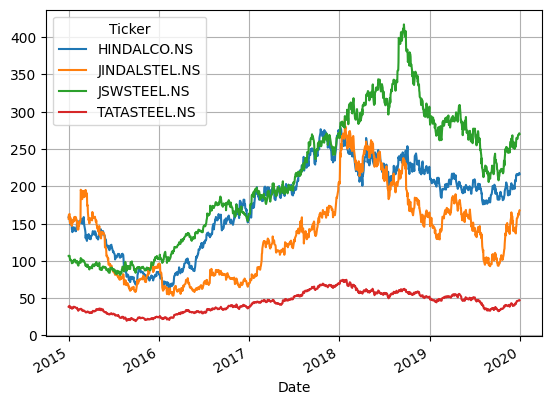

upward  54.1067981985846% out of 4663 total datasize


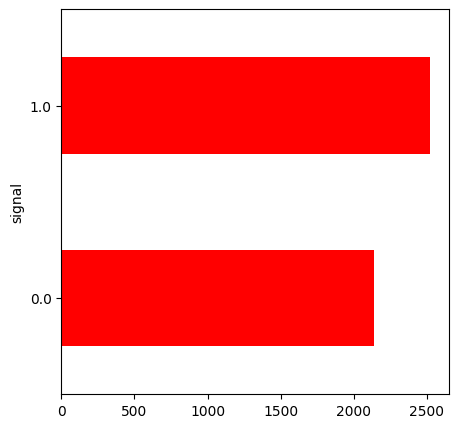

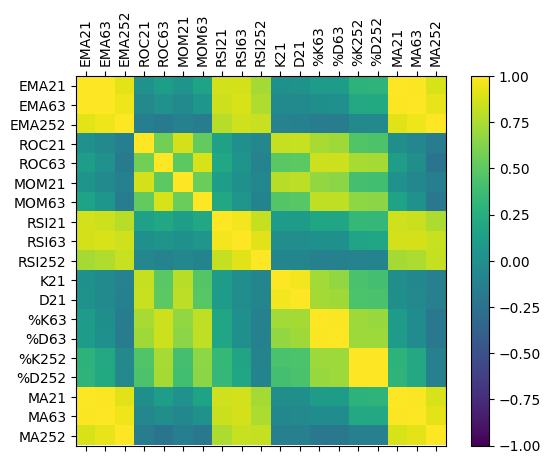

In [14]:
daily_close_px = datas[['Close']].reset_index().pivot('Date', 'Ticker', 'Close')
daily_close_px.plot(grid=True)
plt.show()

fig = plt.figure()
fig.set_size_inches(5,5)
data_s = datasubs.groupby(['signal']).size()
names=['EMA21','EMA63','EMA252','ROC21','ROC63','MOM21','MOM63','RSI21','RSI63','RSI252','K21','D21','%K63','%D63','%K252','%D252','MA21','MA63','MA252']

print("upward  {}% out of {} total datasize".format(100* data_s[1]/(data_s[1]+data_s[0]), data_s[1]+data_s[0]))
plot = data_s.plot(kind='barh', color='red')
X=datasubs.drop(['signal'], axis=1)
y=datasubs['signal']



correlations = X.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names, rotation = 90)
ax.set_yticklabels(names)
plt.show()

In [15]:
forest = RandomForestClassifier(n_estimators=500,random_state=1,n_jobs=-1)
forest.fit(X, y)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=1)

        Importance
RSI21     1.156203
%K21      1.491631
RSI63     1.532833
%D21      1.619572
MOM21     1.911548
ROC21     2.057489
EMA63     2.213268
EMA21     2.261497
MA21      2.379896
MA63      2.380289
MA252     2.458305
RSI252    2.672746
EMA252    2.698272
%K63      3.396239
%D63      5.193133
ROC63    11.282740
MOM63    12.848912
%D252    18.994694
%K252    21.450736


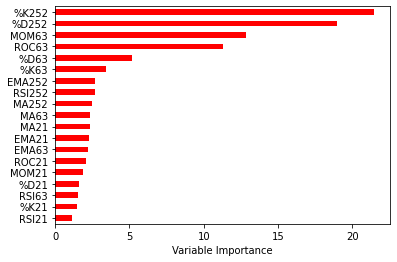

In [ ]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=X.columns)
print(Importance.sort_values('Importance', axis=0, ascending=True))
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None

In [16]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm,neighbors
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import RobustScaler
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [17]:
X_1=datasub.drop(['signal'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X_1, y, test_size=0.2, random_state=1)
print (X_train.shape, Y_train.shape)
print (X_test.shape, Y_test.shape)
from sklearn.preprocessing import RobustScaler
X_train_1=X_train.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)
X_test_1=X_test.drop(['Close','High','Low','Open', 'Volume','short_mavg','long_mavg'], axis=1)

rs = RobustScaler()
rs.fit(X_train_1)
X_train_std = rs.transform(X_train_1)
X_test_std = rs.transform(X_test_1)

(3730, 27) (3730,)
(933, 27) (933,)


In [19]:
print(X_train)
print(X_test)

                                Open        High         Low       Close  \
Ticker        Date                                                         
JSWSTEEL.NS   2017-06-13  199.399994  201.449997  197.100006  197.750000   
TATASTEEL.NS  2016-12-22   38.538197   38.666817   37.180546   37.366329   
              2016-05-02   33.250507   33.441055   32.812248   33.055199   
              2015-11-06   20.855406   21.136461   20.493364   20.984024   
JINDALSTEL.NS 2017-08-16  136.699997  139.800003  130.350006  138.399994   
...                              ...         ...         ...         ...   
HINDALCO.NS   2017-10-19  275.000000  275.250000  273.149994  273.899994   
              2017-04-10  194.100006  195.500000  192.600006  195.050003   
JINDALSTEL.NS 2019-09-17  107.599998  111.300003  101.599998  102.800003   
TATASTEEL.NS  2017-03-22   46.684093   47.046135   46.341110   46.503075   
JINDALSTEL.NS 2016-12-27   65.349998   67.050003   64.900002   66.349998   

           

In [22]:
# Spot Check Algorithms
data_Selected = []
data_Selected.append(('KNN', KNeighborsClassifier()))
data_Selected.append(('CART', DecisionTreeClassifier()))
data_Selected.append(('SVM', SVC()))
data_Selected.append(('RF', RandomForestClassifier()))
data_Selected.append(('NB', GaussianNB()))
# evaluate each model in turn
results = []
names = []
score=['f1','accuracy','precison','recall']
for name, model in data_Selected:
    #kfold = model_selection.KFold(n_splits=10, random_state=1)
    kfold = model_selection.KFold(n_splits=10)
    cv_results =cross_val_score(model, X_train_std, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    output = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(output)

KNN: 0.958713 (0.012643)
CART: 0.967292 (0.009872)
SVM: 0.942359 (0.008414)
RF: 0.984987 (0.005520)
NB: 0.855228 (0.014487)


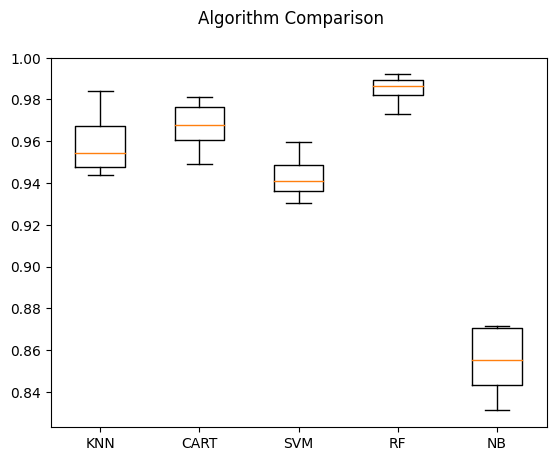

In [23]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [24]:
rf = RandomForestClassifier(n_estimators=500, min_samples_split=5,min_samples_leaf =2,max_features = 10,n_jobs=4,criterion='gini')
predy=rf.fit(X_train_std, Y_train)

In [25]:
predr= rf.predict(X_test_std)

In [ ]:
print(accuracy_score(Y_test, predr))
print(confusion_matrix(Y_test, predr))
print(classification_report(Y_test, predr))

0.9860813704496788
[[399   2]
 [ 11 522]]
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       401
         1.0       1.00      0.98      0.99       533

    accuracy                           0.99       934
   macro avg       0.98      0.99      0.99       934
weighted avg       0.99      0.99      0.99       934



In [26]:
import itertools
from sklearn.metrics import roc_curve, auc, roc_auc_score, log_loss, accuracy_score, confusion_matrix,f1_score

def pltcm(ax, y_test, y_pred, classes, title, th=0.7, cmap=plt.cm.Reds):
    y_pred_labels = (y_pred>th).astype(int)

    cm = confusion_matrix(y_test, y_pred_labels)

    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)

    tickmarks = np.arange(len(classes))
    ax.set_xticks(tickmarks)
    ax.set_yticks(tickmarks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        ax.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    ax.set_ylabel('Actual')
    ax.set_xlabel('Prediction')

def pltauc(ax, y_train, y_pred, y_test, y_tpred, th=0.7):

    y_predl = (y_pred>th).astype(int)
    y_tpredl  = (y_tpred>th).astype(int)

    fpr_tr, tpr_tr, _ = roc_curve(y_train,y_pred)
    roc_auc_tr = auc(fpr_tr, tpr_tr)
    acc_tr = accuracy_score(y_train, y_predl)

    fpr_ts, tpr_ts, _ = roc_curve(y_test,y_tpred)
    roc_auc_ts = auc(fpr_ts, tpr_ts)
    acc_ts = accuracy_score(y_test, y_tpredl)

    ax.plot(fpr_tr, tpr_tr)
    ax.plot(fpr_ts, tpr_ts)

    ax.plot([0, 1], [0, 1], 'k--')

    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC curve')

    train_text = 'train acc = {:.3f}, auc = {:.2f}'.format(acc_tr, roc_auc_tr)
    test_text = 'test acc = {:.3f}, auc = {:.2f}'.format(acc_ts, roc_auc_ts)
    ax.legend([train_text, test_text])

def result(es,threshold,X_train,X_test,y_train,y_test):
    y_pred = es.predict(X_train)
    y_tpred = es.predict(X_test)

    fig,ax = plt.subplots(1,3)
    fig.set_size_inches(15,5)
    pltcm(ax[0],  y_train, y_pred, [0,1], 'Confusion matrix (TRAIN)', threshold)
    pltcm(ax[1],  y_test, y_tpred,   [0,1], 'Confusion matrix (TEST)', threshold)
    pltauc(ax[2], y_train, y_pred, y_test, y_tpred, threshold)
    plt.tight_layout()
    plt.show()

def btf1(es,X_test,y_test):
    thresholds = np.linspace(0.3,0.6,100)
    y_tpred = es.predict(X_test)
    score_set = []
    index_threshold = 0
    sum_score = 0
    for threshold in thresholds:
        y_tpred1  = (y_tpred > threshold).astype(int)
        score = f1_score(y_test, y_tpred1)
        score_set.append(score)
    for i in range(95):
        temp = sum(score_set[i:i+5])
        if temp > sum_score:
            sum_score = temp
            index_threshold = i+2 # the average threshold
    return thresholds[index_threshold],sum_score/5

def testf1(es,bestthreshold,X_test,y_test):
    y_tpred = es.predict(X_test)
    y_tpred1  = (y_tpred > bestthreshold).astype(int)
    score = f1_score(y_test, y_tpred1)
    return score

test f1: 0.9815195071868583 train f1: 0.9985221674876847


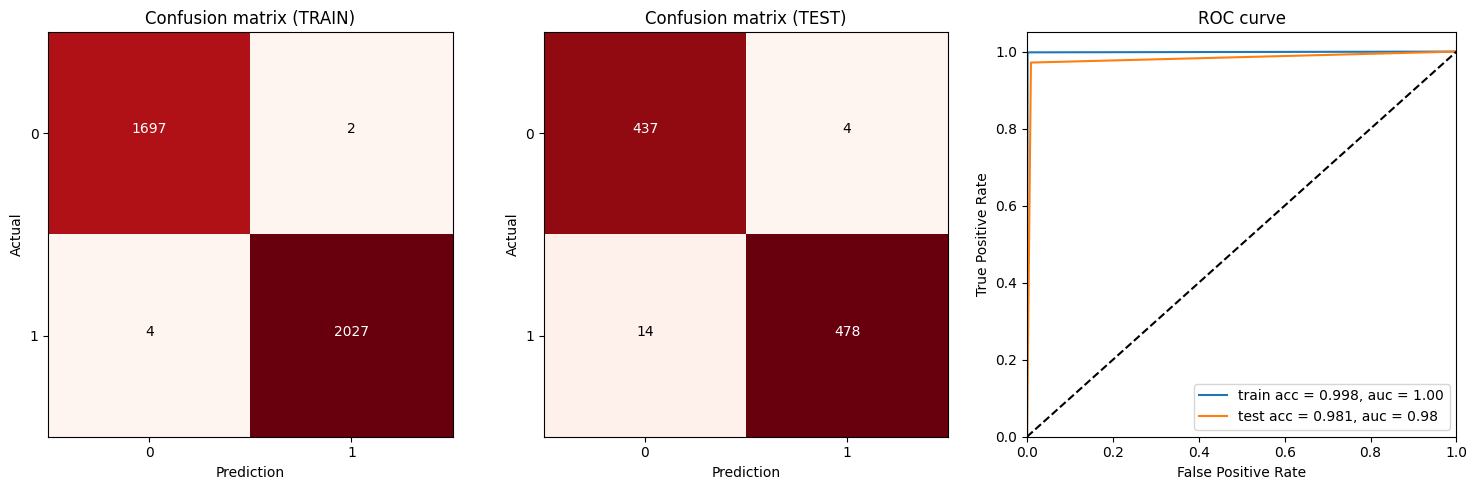

In [27]:
bestthreshold,bestf1 = btf1(rf,X_train_std, Y_train)
testf1 = testf1(rf,bestthreshold,X_test_std,Y_test)
print('test f1:',testf1,'train f1:',bestf1)
result(rf,bestthreshold,X_train_std,X_test_std, Y_train,Y_test)

,,signal_pred,signal_actual,Market Returns,Actual Returns,Strategy Returns
Ticker,Date,,,,,
TATASTEEL.NS,2018-12-27,0.0,0.0,NaN,NaN,NaN
JSWSTEEL.NS,2015-04-23,0.0,0.0,0.945804,0.000000,0.000000
HINDALCO.NS,2016-10-28,1.0,1.0,0.518441,0.000000,0.000000
JSWSTEEL.NS,2016-10-10,1.0,1.0,0.212663,0.212663,0.212663
HINDALCO.NS,2019-12-19,1.0,1.0,0.191900,0.191900,0.191900


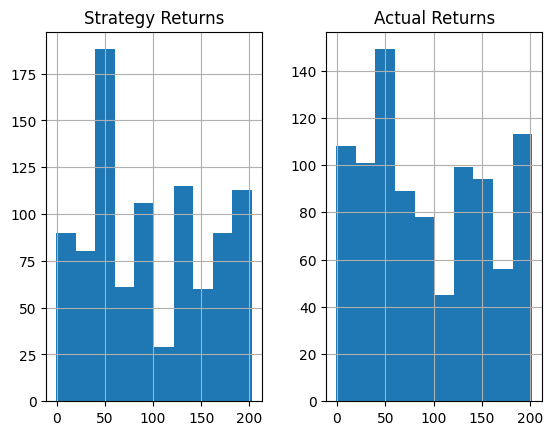

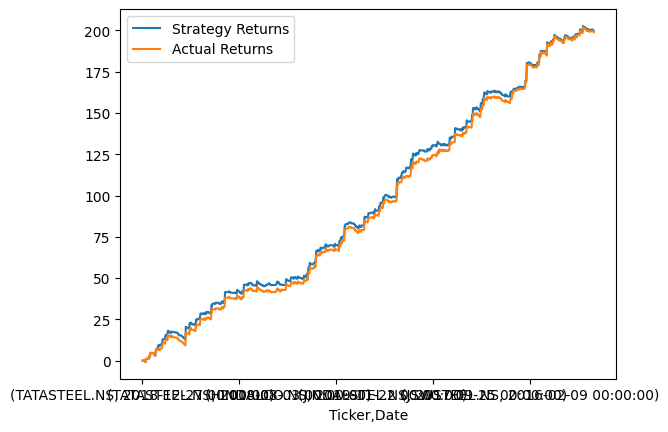

In [28]:
#Create column for Strategy Returns by multiplying the daily returns by the position that was held at close
#of business the previous day
backtestdata = pd.DataFrame(index=X_test.index)
backtestdata['signal_pred'] = predr
backtestdata['signal_actual'] = Y_test
backtestdata['Market Returns'] = X_test['Close'].pct_change()
backtestdata['Actual Returns'] = backtestdata['Market Returns'] * backtestdata['signal_actual'].shift(1)
backtestdata['Strategy Returns'] = backtestdata['Market Returns'] * backtestdata['signal_pred'].shift(1)
backtestdata[['Strategy Returns','Actual Returns']].cumsum().hist()
backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
backtestdata.head()

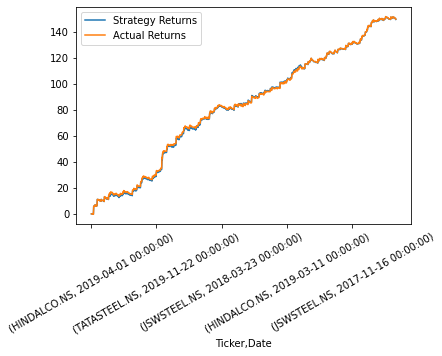

In [ ]:
ax = backtestdata[['Strategy Returns','Actual Returns']].cumsum().plot()
plt.xticks(rotation=30)
plt.show()